In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import transforms


train_dataset = datasets.MNIST(
    root = "../data/MNIST",
    train = True,
    download = True,
    transform = transforms.ToTensor())

test_dataset = datasets.MNIST(
    root = "../data/MNIST",
    train = False,
    transform = transforms.ToTensor())

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
import random
random.seed(42)
torch.manual_seed(42)
if device == "cuda":
    torch.cuda.manual_seed_all(42)

In [4]:
print('number of training data : ', len(train_dataset))
print('number of test data : ', len(test_dataset))

number of training data :  60000
number of test data :  10000


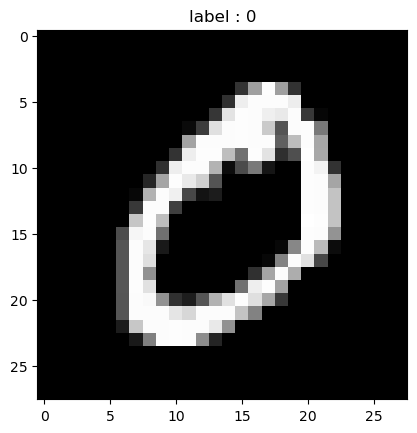

In [29]:
from matplotlib import pyplot as plt

image, label = train_dataset[1]
plt.imshow(image.squeeze(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [7]:
from torch import nn

class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sotfmax_stack = nn.Sequential(
            nn.Linear(28*28, 10),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        outputs = self.linear_sotfmax_stack(x)
        return outputs
        

In [8]:
model = Perceptron().to(device)
print(model)

Perceptron(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_sotfmax_stack): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Sigmoid()
  )
)


In [9]:
# Install the torchsummary package
%pip install torchsummary

from torchsummary import summary
summary(model, (1, 28, 28))

Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
           Sigmoid-3                   [-1, 10]               0
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [11]:
def train_loop():
    model.train()
    for X, y in train_dataloader:
        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    print(loss.item())


from  tqdm import tqdm
epochs = 100
for i in tqdm(range(epochs)):
    print(f"Epoch {i+1} \n------------------")
    train_loop()      

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 
------------------


  1%|          | 1/100 [00:02<04:04,  2.47s/it]

2.261636972427368
Epoch 2 
------------------


  2%|▏         | 2/100 [00:04<04:00,  2.45s/it]

2.236131429672241
Epoch 3 
------------------


  3%|▎         | 3/100 [00:07<04:04,  2.52s/it]

2.221625566482544
Epoch 4 
------------------


  4%|▍         | 4/100 [00:10<04:13,  2.64s/it]

2.186173677444458
Epoch 5 
------------------


  5%|▌         | 5/100 [00:13<04:18,  2.72s/it]

2.167069673538208
Epoch 6 
------------------


  6%|▌         | 6/100 [00:16<04:18,  2.75s/it]

2.1342849731445312
Epoch 7 
------------------


  7%|▋         | 7/100 [00:18<04:17,  2.77s/it]

2.104443311691284
Epoch 8 
------------------


  8%|▊         | 8/100 [00:21<04:15,  2.78s/it]

2.1175365447998047
Epoch 9 
------------------


  9%|▉         | 9/100 [00:24<04:20,  2.86s/it]

2.092005729675293
Epoch 10 
------------------


 10%|█         | 10/100 [00:27<04:19,  2.89s/it]

2.069735288619995
Epoch 11 
------------------


 11%|█         | 11/100 [00:30<04:17,  2.89s/it]

2.0591156482696533
Epoch 12 
------------------


 12%|█▏        | 12/100 [00:33<04:13,  2.88s/it]

2.040475368499756
Epoch 13 
------------------


 13%|█▎        | 13/100 [00:36<04:10,  2.88s/it]

2.0063817501068115
Epoch 14 
------------------


 14%|█▍        | 14/100 [00:39<04:07,  2.87s/it]

2.0353033542633057
Epoch 15 
------------------


 15%|█▌        | 15/100 [00:41<04:01,  2.85s/it]

2.030761241912842
Epoch 16 
------------------


 16%|█▌        | 16/100 [00:44<03:58,  2.84s/it]

2.015734910964966
Epoch 17 
------------------


 17%|█▋        | 17/100 [00:47<03:56,  2.85s/it]

2.003978729248047
Epoch 18 
------------------


 18%|█▊        | 18/100 [00:50<03:52,  2.84s/it]

1.9800487756729126
Epoch 19 
------------------


 19%|█▉        | 19/100 [00:53<03:49,  2.83s/it]

1.9820791482925415
Epoch 20 
------------------


 20%|██        | 20/100 [00:56<03:46,  2.84s/it]

1.9628628492355347
Epoch 21 
------------------


 21%|██        | 21/100 [00:58<03:44,  2.84s/it]

1.9379515647888184
Epoch 22 
------------------


 22%|██▏       | 22/100 [01:01<03:40,  2.83s/it]

1.9553617238998413
Epoch 23 
------------------


 23%|██▎       | 23/100 [01:04<03:37,  2.82s/it]

1.947667121887207
Epoch 24 
------------------


 24%|██▍       | 24/100 [01:07<03:36,  2.84s/it]

1.9210634231567383
Epoch 25 
------------------


 25%|██▌       | 25/100 [01:10<03:33,  2.85s/it]

1.9030256271362305
Epoch 26 
------------------


 26%|██▌       | 26/100 [01:13<03:30,  2.84s/it]

1.9034632444381714
Epoch 27 
------------------


 27%|██▋       | 27/100 [01:15<03:26,  2.83s/it]

1.910407543182373
Epoch 28 
------------------


 28%|██▊       | 28/100 [01:18<03:23,  2.83s/it]

1.8994998931884766
Epoch 29 
------------------


 29%|██▉       | 29/100 [01:21<03:23,  2.87s/it]

1.8890353441238403
Epoch 30 
------------------


 30%|███       | 30/100 [01:24<03:25,  2.94s/it]

1.8641409873962402
Epoch 31 
------------------


 31%|███       | 31/100 [01:27<03:19,  2.90s/it]

1.8703012466430664
Epoch 32 
------------------


 32%|███▏      | 32/100 [01:30<03:15,  2.88s/it]

1.884968876838684
Epoch 33 
------------------


 33%|███▎      | 33/100 [01:33<03:13,  2.88s/it]

1.8967925310134888
Epoch 34 
------------------


 34%|███▍      | 34/100 [01:36<03:10,  2.89s/it]

1.8789011240005493
Epoch 35 
------------------


 35%|███▌      | 35/100 [01:39<03:08,  2.90s/it]

1.8766549825668335
Epoch 36 
------------------


 36%|███▌      | 36/100 [01:42<03:05,  2.89s/it]

1.8914786577224731
Epoch 37 
------------------


 37%|███▋      | 37/100 [01:44<03:01,  2.88s/it]

1.875770092010498
Epoch 38 
------------------


 38%|███▊      | 38/100 [01:47<02:57,  2.86s/it]

1.8943332433700562
Epoch 39 
------------------


 39%|███▉      | 39/100 [01:50<02:54,  2.86s/it]

1.850800633430481
Epoch 40 
------------------


 40%|████      | 40/100 [01:53<02:51,  2.86s/it]

1.8592514991760254
Epoch 41 
------------------


 41%|████      | 41/100 [01:56<02:48,  2.86s/it]

1.8279809951782227
Epoch 42 
------------------


 42%|████▏     | 42/100 [01:59<02:45,  2.85s/it]

1.8506666421890259
Epoch 43 
------------------


 43%|████▎     | 43/100 [02:01<02:42,  2.84s/it]

1.8557604551315308
Epoch 44 
------------------


 44%|████▍     | 44/100 [02:04<02:39,  2.85s/it]

1.8498320579528809
Epoch 45 
------------------


 45%|████▌     | 45/100 [02:07<02:37,  2.86s/it]

1.8538230657577515
Epoch 46 
------------------


 46%|████▌     | 46/100 [02:10<02:33,  2.84s/it]

1.8461023569107056
Epoch 47 
------------------


 47%|████▋     | 47/100 [02:13<02:30,  2.85s/it]

1.8425064086914062
Epoch 48 
------------------


 48%|████▊     | 48/100 [02:16<02:27,  2.84s/it]

1.8255716562271118
Epoch 49 
------------------


 49%|████▉     | 49/100 [02:18<02:25,  2.84s/it]

1.781527042388916
Epoch 50 
------------------


 50%|█████     | 50/100 [02:21<02:22,  2.84s/it]

1.8161029815673828
Epoch 51 
------------------


 51%|█████     | 51/100 [02:24<02:19,  2.84s/it]

1.8049235343933105
Epoch 52 
------------------


 52%|█████▏    | 52/100 [02:27<02:20,  2.93s/it]

1.8424829244613647
Epoch 53 
------------------


 53%|█████▎    | 53/100 [02:30<02:15,  2.88s/it]

1.8077665567398071
Epoch 54 
------------------


 54%|█████▍    | 54/100 [02:33<02:08,  2.79s/it]

1.8115190267562866
Epoch 55 
------------------


 55%|█████▌    | 55/100 [02:35<02:06,  2.80s/it]

1.8190580606460571
Epoch 56 
------------------


 56%|█████▌    | 56/100 [02:38<02:03,  2.81s/it]

1.8093652725219727
Epoch 57 
------------------


 57%|█████▋    | 57/100 [02:41<02:00,  2.81s/it]

1.8221259117126465
Epoch 58 
------------------


 58%|█████▊    | 58/100 [02:44<01:58,  2.81s/it]

1.7987805604934692
Epoch 59 
------------------


 59%|█████▉    | 59/100 [02:47<01:55,  2.83s/it]

1.7785120010375977
Epoch 60 
------------------


 60%|██████    | 60/100 [02:50<01:54,  2.86s/it]

1.799491047859192
Epoch 61 
------------------


 61%|██████    | 61/100 [02:53<01:51,  2.87s/it]

1.8080482482910156
Epoch 62 
------------------


 62%|██████▏   | 62/100 [02:55<01:48,  2.86s/it]

1.7954009771347046
Epoch 63 
------------------


 63%|██████▎   | 63/100 [02:58<01:45,  2.85s/it]

1.7902637720108032
Epoch 64 
------------------


 64%|██████▍   | 64/100 [03:01<01:42,  2.85s/it]

1.789127230644226
Epoch 65 
------------------


 65%|██████▌   | 65/100 [03:04<01:39,  2.85s/it]

1.7961171865463257
Epoch 66 
------------------


 66%|██████▌   | 66/100 [03:07<01:38,  2.89s/it]

1.7737971544265747
Epoch 67 
------------------


 67%|██████▋   | 67/100 [03:10<01:34,  2.87s/it]

1.8007007837295532
Epoch 68 
------------------


 68%|██████▊   | 68/100 [03:13<01:31,  2.85s/it]

1.7538342475891113
Epoch 69 
------------------


 69%|██████▉   | 69/100 [03:15<01:28,  2.86s/it]

1.7815152406692505
Epoch 70 
------------------


 70%|███████   | 70/100 [03:18<01:26,  2.87s/it]

1.7722808122634888
Epoch 71 
------------------


 71%|███████   | 71/100 [03:21<01:23,  2.88s/it]

1.7890748977661133
Epoch 72 
------------------


 72%|███████▏  | 72/100 [03:24<01:20,  2.88s/it]

1.8187705278396606
Epoch 73 
------------------


 73%|███████▎  | 73/100 [03:27<01:18,  2.89s/it]

1.7917962074279785
Epoch 74 
------------------


 74%|███████▍  | 74/100 [03:30<01:15,  2.89s/it]

1.787737488746643
Epoch 75 
------------------


 75%|███████▌  | 75/100 [03:33<01:12,  2.91s/it]

1.8098993301391602
Epoch 76 
------------------


 76%|███████▌  | 76/100 [03:36<01:09,  2.90s/it]

1.7712559700012207
Epoch 77 
------------------


 77%|███████▋  | 77/100 [03:39<01:06,  2.89s/it]

1.7581019401550293
Epoch 78 
------------------


 78%|███████▊  | 78/100 [03:42<01:03,  2.89s/it]

1.7432870864868164
Epoch 79 
------------------


 79%|███████▉  | 79/100 [03:44<01:00,  2.89s/it]

1.763895869255066
Epoch 80 
------------------


 80%|████████  | 80/100 [03:47<00:58,  2.90s/it]

1.7712593078613281
Epoch 81 
------------------


 81%|████████  | 81/100 [03:50<00:55,  2.90s/it]

1.785475254058838
Epoch 82 
------------------


 82%|████████▏ | 82/100 [03:53<00:52,  2.93s/it]

1.787796139717102
Epoch 83 
------------------


 83%|████████▎ | 83/100 [03:56<00:49,  2.93s/it]

1.7745847702026367
Epoch 84 
------------------


 84%|████████▍ | 84/100 [03:59<00:46,  2.92s/it]

1.7433873414993286
Epoch 85 
------------------


 85%|████████▌ | 85/100 [04:02<00:43,  2.89s/it]

1.7637041807174683
Epoch 86 
------------------


 86%|████████▌ | 86/100 [04:05<00:40,  2.88s/it]

1.7825446128845215
Epoch 87 
------------------


 87%|████████▋ | 87/100 [04:08<00:37,  2.85s/it]

1.7365120649337769
Epoch 88 
------------------


 88%|████████▊ | 88/100 [04:10<00:33,  2.83s/it]

1.7670611143112183
Epoch 89 
------------------


 89%|████████▉ | 89/100 [04:13<00:31,  2.85s/it]

1.7337112426757812
Epoch 90 
------------------


 90%|█████████ | 90/100 [04:16<00:28,  2.84s/it]

1.7755812406539917
Epoch 91 
------------------


 91%|█████████ | 91/100 [04:19<00:25,  2.85s/it]

1.7523999214172363
Epoch 92 
------------------


 92%|█████████▏| 92/100 [04:22<00:22,  2.84s/it]

1.7432713508605957
Epoch 93 
------------------


 93%|█████████▎| 93/100 [04:25<00:19,  2.83s/it]

1.7280040979385376
Epoch 94 
------------------


 94%|█████████▍| 94/100 [04:27<00:16,  2.82s/it]

1.7378021478652954
Epoch 95 
------------------


 95%|█████████▌| 95/100 [04:30<00:14,  2.83s/it]

1.7692608833312988
Epoch 96 
------------------


 96%|█████████▌| 96/100 [04:33<00:11,  2.83s/it]

1.7372431755065918
Epoch 97 
------------------


 97%|█████████▋| 97/100 [04:36<00:08,  2.83s/it]

1.7580255270004272
Epoch 98 
------------------


 98%|█████████▊| 98/100 [04:39<00:05,  2.82s/it]

1.7435752153396606
Epoch 99 
------------------


 99%|█████████▉| 99/100 [04:41<00:02,  2.81s/it]

1.7479066848754883
Epoch 100 
------------------


100%|██████████| 100/100 [04:44<00:00,  2.85s/it]

1.7362993955612183


In [ ]:
# def test_loop():
#     model.eval()

#     for X, y in test_dataloader:
#         X = X.to(device)
#         y = y.to(device)

#         with torch.no_grad():
#             pred = model(X)
        
#         print(pred.argmax(1)[0],y[0])
#         # correct = (pred.argmax(1) == y).type(torch.float).sum().item() / len(y)
#         # print(correct*100)
        
# test_loop()


tensor(8, device='cuda:0') tensor(8, device='cuda:0')
tensor(5, device='cuda:0') tensor(5, device='cuda:0')
tensor(8, device='cuda:0') tensor(8, device='cuda:0')
tensor(4, device='cuda:0') tensor(4, device='cuda:0')
tensor(7, device='cuda:0') tensor(7, device='cuda:0')
tensor(6, device='cuda:0') tensor(5, device='cuda:0')
tensor(2, device='cuda:0') tensor(2, device='cuda:0')
tensor(6, device='cuda:0') tensor(6, device='cuda:0')
tensor(1, device='cuda:0') tensor(1, device='cuda:0')
tensor(4, device='cuda:0') tensor(4, device='cuda:0')
tensor(6, device='cuda:0') tensor(6, device='cuda:0')
tensor(1, device='cuda:0') tensor(1, device='cuda:0')
tensor(1, device='cuda:0') tensor(1, device='cuda:0')
tensor(0, device='cuda:0') tensor(0, device='cuda:0')
tensor(7, device='cuda:0') tensor(7, device='cuda:0')
tensor(9, device='cuda:0') tensor(9, device='cuda:0')
tensor(9, device='cuda:0') tensor(9, device='cuda:0')
tensor(5, device='cuda:0') tensor(3, device='cuda:0')
tensor(3, device='cuda:0') t

In [23]:
def test_loop():
    model.eval()  # 평가 모드 설정

    total_correct = 0
    total_samples = 0
    true_positives = torch.zeros(10)  # 각 클래스별 True Positive
    false_positives = torch.zeros(10)  # 각 클래스별 False Positive
    false_negatives = torch.zeros(10)  # 각 클래스별 False Negative

    for X, y in test_dataloader:
        X = X.to(device)
        y = y.to(device)

        with torch.no_grad():  # 기울기 계산 비활성화
            pred = model(X)  # 모델 예측
            preds = pred.argmax(1)  # 가장 높은 확률의 클래스 선택

            # Accuracy 계산
            total_correct += (preds == y).sum().item()
            total_samples += y.size(0)

            # F1-Score 계산용: TP, FP, FN 갱신
            for cls in range(10):  # 클래스 수가 10 (MNIST)
                true_positives[cls] += ((preds == cls) & (y == cls)).sum().item()
                false_positives[cls] += ((preds == cls) & (y != cls)).sum().item()
                false_negatives[cls] += ((preds != cls) & (y == cls)).sum().item()

    # Accuracy 계산
    accuracy = total_correct / total_samples
    print(f"Accuracy: {accuracy:.2f}")

    # 전체 데이터 개수 중 몇 개를 맞췄는지 출력
    print(f"Correct: {total_correct}/{total_samples}")

    # F1-Score 계산
    f1_scores = []
    for cls in range(10):
        precision = true_positives[cls] / (true_positives[cls] + false_positives[cls] + 1e-8)
        recall = true_positives[cls] / (true_positives[cls] + false_negatives[cls] + 1e-8)
        f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
        f1_scores.append(f1.item())

    macro_f1 = sum(f1_scores) / len(f1_scores)  # 매크로 F1 스코어
    print(f"F1 Score (Macro): {macro_f1:.2f}")

test_loop()


Accuracy: 0.86
Correct: 8563/10000
F1 Score (Macro): 0.85


In [14]:
torch.set_printoptions(sci_mode=False)

pred:  3 label: 5
tensor([[ 9.3527,  1.9940,  5.8180, 77.0254,  0.2621, 68.5264,  6.0386, 12.6099,
         13.5917,  3.4851]], device='cuda:0', grad_fn=<MulBackward0>)


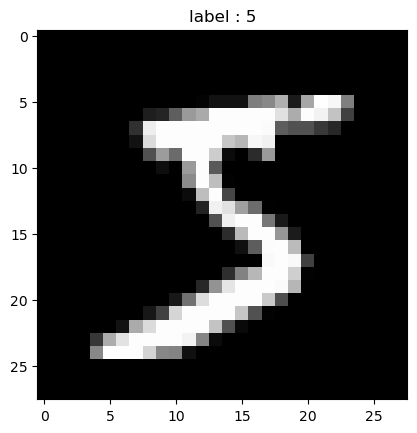

In [25]:
image, label = train_dataset[0]
pred = model(image.to(device))*100
print('pred: ',pred.argmax(1)[0].cpu().numpy(), 'label:',label)
print(pred)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

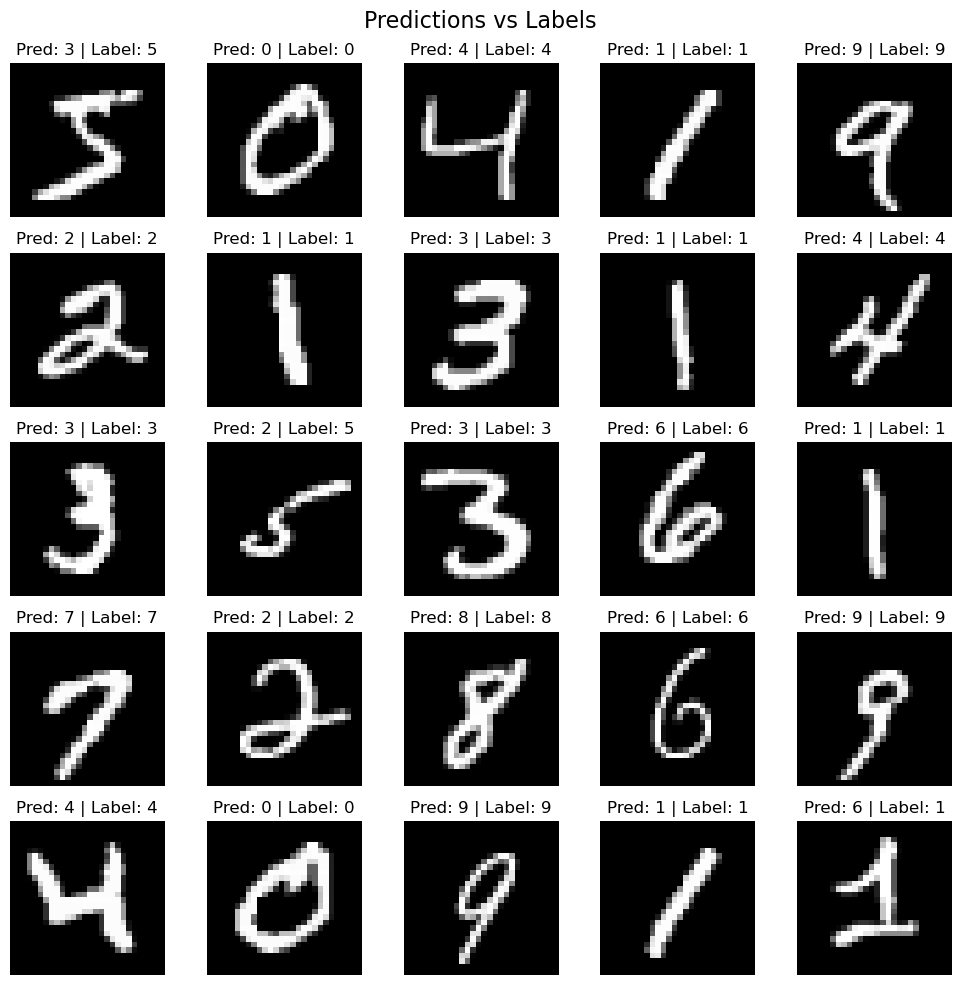

In [26]:
import torch
import matplotlib.pyplot as plt

# 1. 데이터셋에서 25개 샘플 가져오기
images, labels = zip(*[train_dataset[i] for i in range(25)])  # 첫 25개 샘플
images = torch.stack(images)  # 텐서로 변환
labels = torch.tensor(labels)  # 정답 레이블

# 2. 모델 예측
model.eval()
with torch.no_grad():
    preds = model(images.to(device))  # 모델 예측
    pred_labels = preds.argmax(1).cpu()  # 예측 클래스

# 3. 5x5 그리드로 이미지와 예측값 시각화
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle('Predictions vs Labels', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')  # 이미지 표시
    ax.set_title(f'Pred: {pred_labels[i].item()} | Label: {labels[i].item()}')
    ax.axis('off')  # 축 숨기기

plt.tight_layout()
plt.show()


In [20]:
import torch
import torchvision
import sys

print("Python Version:", sys.version)
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA Version:", torch.version.cuda)
    print("GPU Name:", torch.cuda.get_device_name(0))


Python Version: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
PyTorch Version: 2.5.1
Torchvision Version: 0.20.1
CUDA Available: True
CUDA Version: 12.4
GPU Name: NVIDIA GeForce RTX 4060 Ti
